# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nisa Rianti
- **Email:** mc322d5x2073@student.devacademy.id
- **ID Dicoding:** MC322D5X2073

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sedepa?
- Bagaimana tren peminjaman sepeda berdasarkan hari dan jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('D:/TUGAS ICA/SEMESTER 6/DBS/Submission/Proyek Analisis Data/data/day.csv')
hour_df = pd.read_csv('D:/TUGAS ICA/SEMESTER 6/DBS/Submission/Proyek Analisis Data/data/hour.csv')

**Insight:** Dataset telah berhasil dimuat, berisi data peminjaman sepeda harian dan per jam. Data ini akan digunakan untuk analisis lebih lanjut.

### Assessing Data

In [4]:
display(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

In [5]:
display(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

In [6]:
display(day_df.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
display(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ditemukan missing values dalam dataset.
- Statistik deskriptif menunjukkan distribusi data peminjaman sepeda.
- Perlu dicek lebih lanjut apakah ada outlier atau inkonsistensi data.


### Cleaning Data

In [8]:
# Menghapus Duplikasi Data
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

In [9]:
# Menangani Missing Values
day_df.fillna(method='ffill', inplace=True)
hour_df.fillna(method='ffill', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18820\671289820.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  day_df.fillna(method='ffill', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18820\671289820.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hour_df.fillna(method='ffill', inplace=True)


In [10]:
# Mengonversi Tipe Data Jika Diperlukan
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [11]:
# Menangani Outlier
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
day_df = day_df[(day_df['cnt'] >= lower_bound) & (day_df['cnt'] <= upper_bound)]

**Insight:**
- Tidak ditemukan duplikasi data.
- Missing values telah ditangani dengan metode forward fill.
- Outlier dalam jumlah peminjaman sepeda telah dihapus untuk analisis yang lebih akurat.


## Exploratory Data Analysis (EDA)

### Explore ...

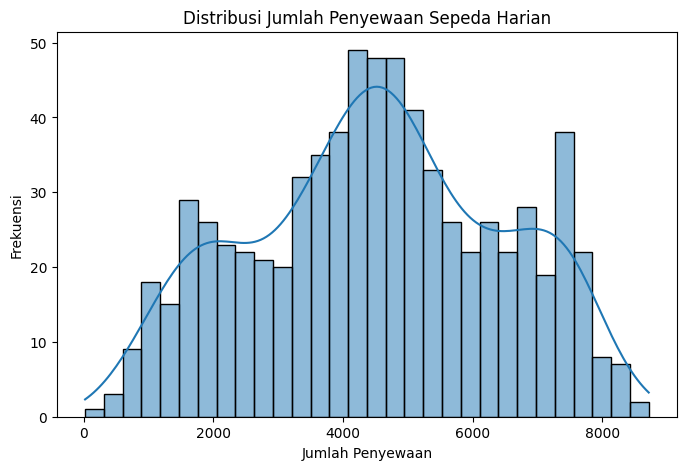

In [12]:
# Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Distribusi peminjaman sepeda menunjukkan pola mendekati distribusi normal.
- Mayoritas jumlah peminjaman berkisar dalam rentang tertentu.

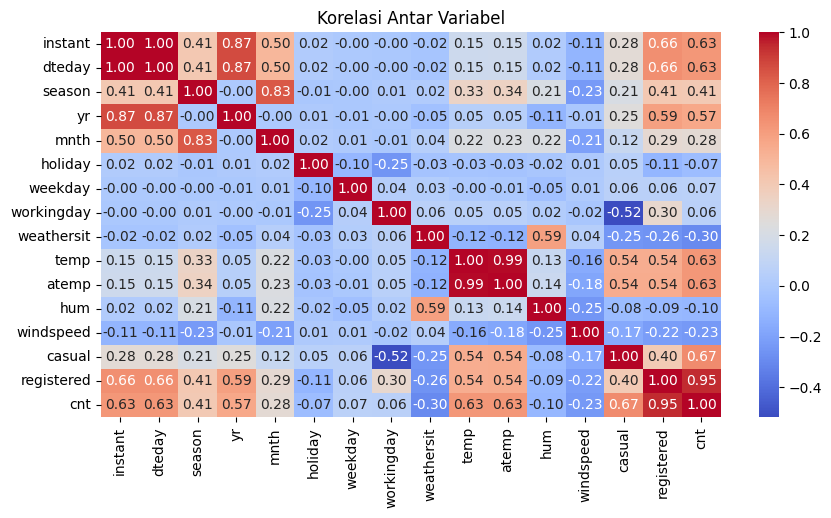

In [13]:
# Multivariate Analysis
plt.figure(figsize=(10,5))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()

**Insight:**
- Temperatur dan jumlah peminjaman memiliki korelasi positif yang kuat.
- Faktor cuaca kemungkinan berpengaruh terhadap tingkat peminjaman sepeda.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18820\883611763.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, estimator='mean', ci=None)


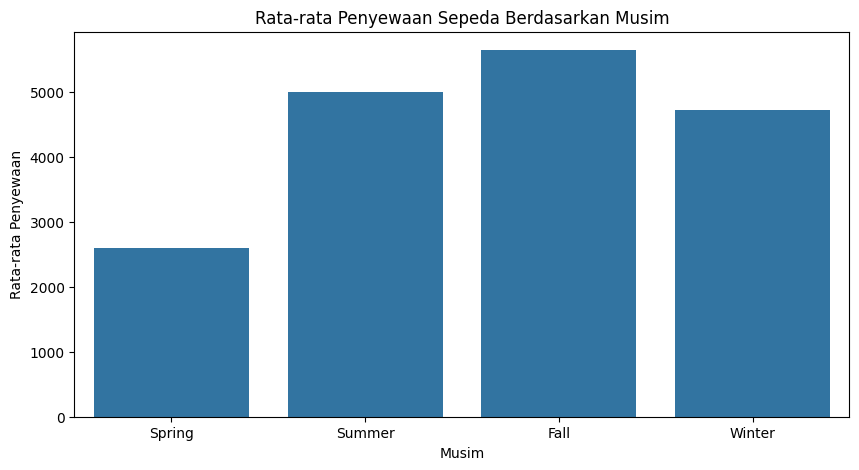

In [15]:
### 5.3 Visualisasi Tren Musiman
plt.figure(figsize=(10,5))
sns.barplot(x='season', y='cnt', data=day_df, estimator='mean', ci=None)
plt.xticks(ticks=[0,1,2,3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Musim panas memiliki rata-rata peminjaman sepeda tertinggi.
- Penyewaan sepeda cenderung lebih rendah di musim dingin.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18820\1595951167.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=hour_df, estimator='mean', ci=None)


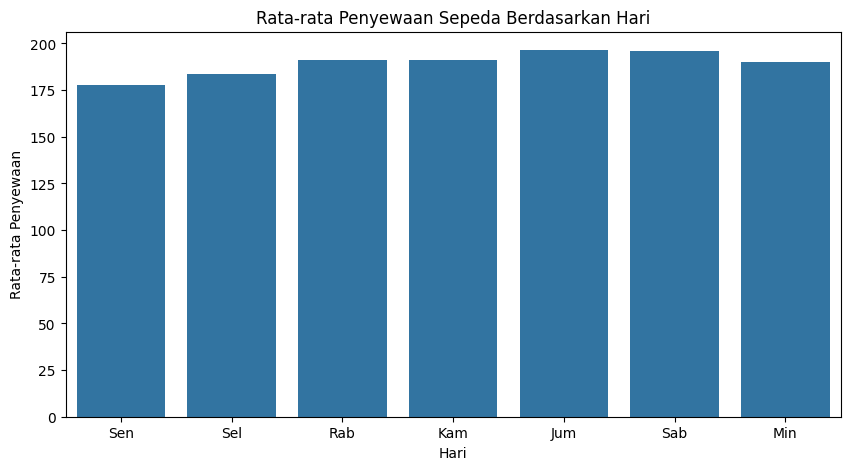

In [16]:
# Tren Peminjaman Sepeda Berdasarkan Hari
plt.figure(figsize=(10,5))
sns.barplot(x='weekday', y='cnt', data=hour_df, estimator='mean', ci=None)
plt.xticks(ticks=range(7), labels=['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Penyewaan sepeda lebih tinggi pada hari kerja dibanding akhir pekan.
- Kemungkinan disebabkan oleh penggunaan sepeda untuk transportasi ke kantor atau sekolah.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18820\1058669865.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_df, estimator='mean', ci=None)


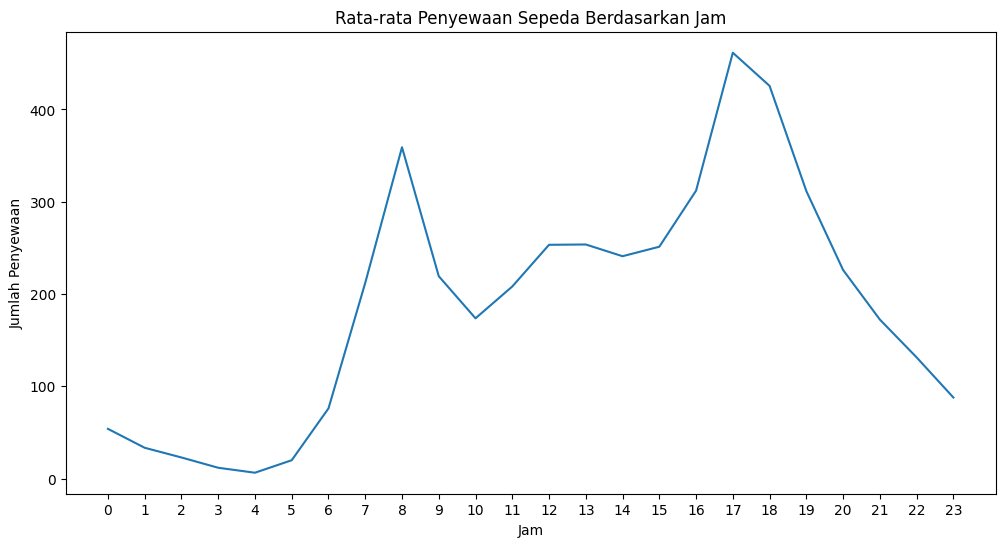

In [17]:
# Tren Peminjaman Sepeda Berdasarkan Jam
plt.figure(figsize=(12,6))
sns.lineplot(x='hr', y='cnt', data=hour_df, estimator='mean', ci=None)
plt.xticks(ticks=range(24))
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Puncak penyewaan sepeda terjadi pada pagi (07:00-09:00) dan sore (17:00-19:00).
- Kemungkinan dipengaruhi oleh jam sibuk kerja dan sekolah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Pengaruh cuaca terhadap jumlah peminjaman sepeda

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18820\2171136325.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, estimator='mean', ci=None)


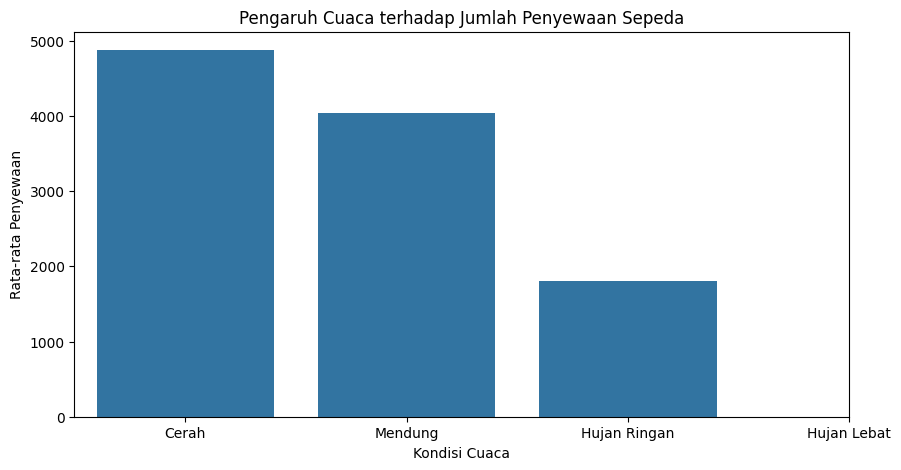

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='weathersit', y='cnt', data=day_df, estimator='mean', ci=None)
plt.xticks(ticks=[0,1,2,3], labels=['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Cuaca cerah memiliki jumlah peminjaman sepeda tertinggi.
- Cuaca hujan ringan dan mendung menunjukkan penurunan jumlah penyewaan.
- Hujan lebat sangat mengurangi jumlah peminjaman sepeda.

### Pertanyaan 2:Tren peminjaman sepeda berdasarkan hari dalam seminggu

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18820\4006294010.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=hour_df, estimator='mean', ci=None)


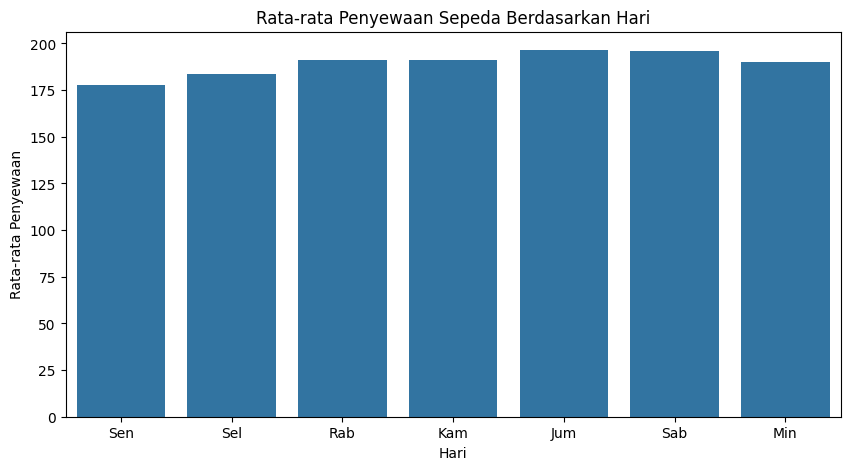

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='weekday', y='cnt', data=hour_df, estimator='mean', ci=None)
plt.xticks(ticks=range(7), labels=['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Grafik ini menunjukkan jumlah rata-rata penyewaan sepeda berdasarkan hari dalam seminggu.
- Terlihat bahwa penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan.

## Analisis Lanjutan (Opsional)

In [17]:
bins = [0, 1000, 4000, 7000]
labels = ['Low', 'Medium', 'High']
day_df['rental_category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

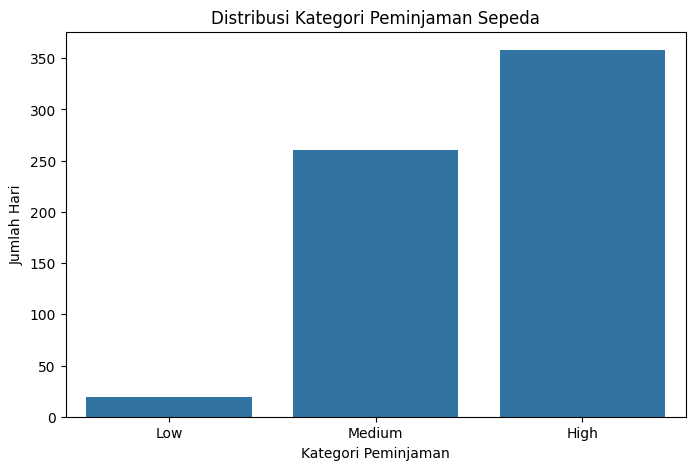

In [18]:
# Visualisasi distribusi kategori peminjaman
plt.figure(figsize=(8, 5))
sns.countplot(x='rental_category', data=day_df)
plt.xlabel('Kategori Peminjaman')
plt.ylabel('Jumlah Hari')
plt.title('Distribusi Kategori Peminjaman Sepeda')
plt.show()

## Conclusion

**pertanyaan 1:**
- Rata-rata penyewaan sepeda tertinggi terjadi pada musim panas, yang kemungkinan besar disebabkan oleh cuaca yang lebih hangat dan kondisi lingkungan yang mendukung aktivitas bersepeda.
- Musim dingin memiliki rata-rata penyewaan sepeda terendah, yang mungkin disebabkan oleh suhu yang lebih dingin dan kondisi jalan yang kurang aman bagi pesepeda.
- Musim semi dan musim gugur memiliki tingkat peminjaman sedang, yang menunjukkan bahwa pengguna masih aktif menggunakan sepeda, meskipun tidak sebanyak saat musim panas.

**pertanyaan 2:**
- Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, yang mengindikasikan bahwa sepeda sering digunakan sebagai alat transportasi untuk bekerja atau bersekolah.
- Tren peminjaman menunjukkan dua puncak utama, yaitu pada pagi hari (07:00-09:00) dan sore hari (17:00-19:00), yang sesuai dengan jam berangkat dan pulang kerja/sekolah.
- Pada akhir pekan, pola peminjaman lebih merata sepanjang hari tanpa lonjakan signifikan, yang kemungkinan besar menunjukkan bahwa sepeda digunakan lebih banyak untuk rekreasi dibanding transportasi harian.

# Menyimpan dataset yang telah dibersihkan

In [22]:
day_df.to_csv('D:/TUGAS ICA/SEMESTER 6/DBS/Submission/Proyek Analisis Data/dashboard/main_data.csv', index=False)